# 库的加载以及CUDA加载

In [1]:
import keras
import os
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
print("tensorflow_Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

import torch
print("torch:",torch.cuda.device_count())

tensorflow_Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
torch: 1


# 二次函数曲线拟合

> train_on_batch与fit之间的区别：train_on_batch函数接受单批数据，执行反向传播，然后更新模型参数，该批数据的大小可以是任意的，即它不需要提供明确的批量大小，属于精细化控制训练模型，大部分情况下我们不需要这么精细，99%情况下使用fit_generator训练方式即可

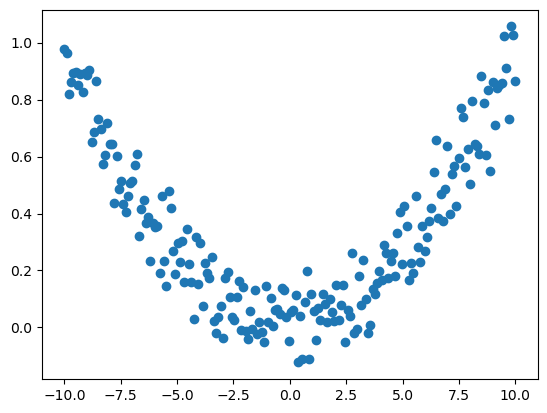

Epoch 1/3000
10/10 [==============================] - 2s 2ms/step - loss: 0.0916
Epoch 2/3000
10/10 [==============================] - 0s 2ms/step - loss: 0.0897
Epoch 3/3000
10/10 [==============================] - 0s 3ms/step - loss: 0.0892
Epoch 4/3000
10/10 [==============================] - 0s 3ms/step - loss: 0.0884
Epoch 5/3000
10/10 [==============================] - 0s 4ms/step - loss: 0.0876
Epoch 6/3000
10/10 [==============================] - 0s 3ms/step - loss: 0.0870
Epoch 7/3000
10/10 [==============================] - 0s 2ms/step - loss: 0.0855
Epoch 8/3000
10/10 [==============================] - 0s 3ms/step - loss: 0.0843
Epoch 9/3000
10/10 [==============================] - 0s 3ms/step - loss: 0.0848
Epoch 10/3000
10/10 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 11/3000
10/10 [==============================] - 0s 3ms/step - loss: 0.0823
Epoch 12/3000
10/10 [==============================] - 0s 3ms/step - loss: 0.0819
Epoch 13/3000
10/10 [====

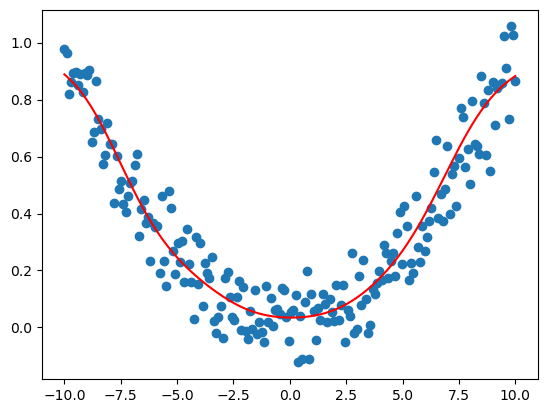

In [2]:
# 生成数据
data = numpy.linspace(-10, 10, 200)
noise = numpy.random.normal(0, 0.1, data.shape)
y = data**2 / 100 + noise

# 绘制散点图
plt.scatter(data, y)
plt.show()

# 构建模型
model = Sequential([
    Dense(10, input_dim=1, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

# 自定义优化器
sgd = SGD(learning_rate=0.5)

# 编译模型
model.compile(optimizer=sgd, loss='mse')

# 训练模型
history = model.fit(data, y, epochs=3000, batch_size=20)

# 使用训练好的模型进行预测
pre = model.predict(data)

# 绘制结果图
plt.scatter(data, y)
plt.plot(data, pre, 'r-')
plt.show()

>调节输入值定义域对拟合结果有很大影响，主要影响的是收敛速度，由于SGD不能自适应收敛速度，这就导致一旦输入定义域在折线变化的区间之外，需要很多epoch才能达到输入定义域在折线变化内的效果，学习速率同样也和输入数据的尺度相关

>对学习率的敏感程度：sigmoid<Tanh<ReLU

>对定义域匹配的敏感程度：ReLU<sigmoid<Tanh

>对值域匹配的敏感程度：ReLU<Tanh<sigmoid
>>sigmoid娇生惯养，但凡它的值域与输出值域不匹配，那就是寄，因此不可以放在输出层

>由以上分析可以看出，其实ReLU才是最好的拟合方式，但是由于对学习率要求过于严格，与其他那俩配合不了，并且输出还是直线，对曲线拟合而言误差太大

## 尝试组合不同的激活函数

### 与线性激活函数配合

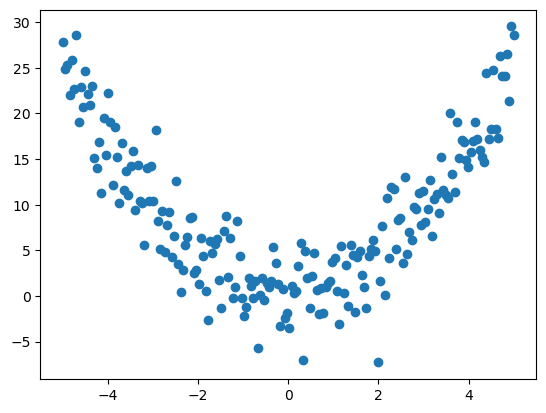

Epoch 1/1000
10/10 [==============================] - 0s 5ms/step - loss: 115.7711
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 79.6655
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 68.7226
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 67.9131
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 67.7465
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 68.0572
Epoch 7/1000
10/10 [==============================] - 0s 5ms/step - loss: 67.0205
Epoch 8/1000
10/10 [==============================] - 0s 4ms/step - loss: 67.3250
Epoch 9/1000
10/10 [==============================] - 0s 5ms/step - loss: 66.8160
Epoch 10/1000
10/10 [==============================] - 0s 5ms/step - loss: 66.3173
Epoch 11/1000
10/10 [==============================] - 0s 5ms/step - loss: 65.6806
Epoch 12/1000
10/10 [==============================] - 0s 5ms/step - loss: 64.8944
Epoch 13/100

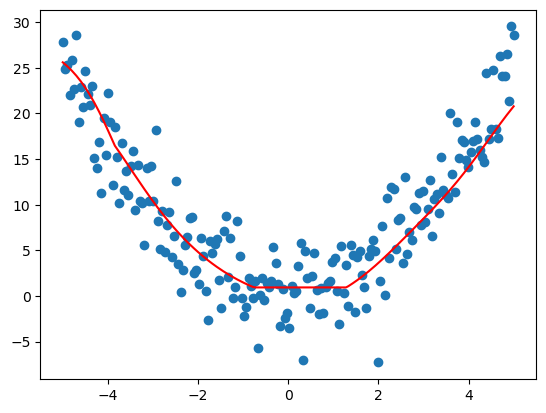

In [3]:
# 生成数据
data = numpy.linspace(-5, 5, 200)
noise = numpy.random.normal(0, 3, data.shape)
y = numpy.square(data) + noise

# 绘制原始数据的散点图
plt.scatter(data, y)
plt.show()

# 构建模型
model = Sequential()
sgd = SGD(learning_rate=0.003)

# 添加层
model.add(Dense(units=8, input_dim=1, activation='sigmoid'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer=sgd, loss='mse')

# 训练模型
model.fit(data, y, epochs=1000, batch_size=20)

# 训练好的模型进行预测
pre = model.predict(data, batch_size=100)

# 绘制训练后的预测结果
plt.scatter(data, y)  # 散点图
plt.plot(data, pre, 'r-')  # 预测曲线
plt.show()

In [ ]:
loss = model.evaluate(data, y, verbose=0)
print("Loss:", loss)
y_pred = model.predict(data)
std_dev = numpy.std(y - y_pred)
print("Standard Deviation between predicted and true values:", std_dev)

Loss: 10.295581817626953
7/7 [==============================] - 0s 986us/step
Standard Deviation between predicted and true values: 10.726437182135982


>得到结论，ReLU可以与sigmoid，正比例函数等激活函数配合，ReLU调参特性与正比例函数相当接近，与sigmoid配合时学习率必须降低，因此epoch量会显著提升。用ReLU与sigmoid配合可以增加折线数量，但是增加折线的数量小于等于该层神经元的数目，因此可以先用多神经元跑一下，确定能增加的折线数量上限，再减小该层神经元数量，将大幅增加拟合速率

### 将sigmoid与ReLU对调

In [ ]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,3,data.shape)
y=numpy.square(data)+noise

plt.scatter(data,y)# 散点图
plt.show()

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
sgd=SGD(learning_rate=0.003)# 自定义优化算法随机梯度下降法，设置学习率，默认为0.01
# 添加输入层和隐藏层、激活函数
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度

model.compile(optimizer=sgd,loss='mse')# 优化方式,损失函数，评估指标
for i in range(2000):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()

### 改变不同层的学习速率

In [ ]:
data=numpy.linspace(-5,5,200)
noise=numpy.random.normal(0,3,data.shape)
y=numpy.square(data)+noise

plt.scatter(data,y)# 散点图
plt.show()

sgd_dense1 = SGD(learning_rate=0.01)
sgd_dense2 = SGD(learning_rate=0.6)
sgd_dense3 = SGD(learning_rate=2.0)
sgd_dense4 = SGD(learning_rate=0.1)
sgd_output = SGD(learning_rate=0.01)

model=Sequential()# 按顺序构成的模型，输入层，隐藏层，输出
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.compile(optimizer=sgd_dense1, loss='mse')
model.add(Dense(units=8,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.compile(optimizer=sgd_dense2, loss='mse')
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('sigmoid'))
model.compile(optimizer=sgd_dense3, loss='mse')
model.add(Dense(units=5,input_dim=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.add(Activation('relu'))
model.compile(optimizer=sgd_dense4, loss='mse')

model.add(Dense(units=1))# DENSE表示全连接层，units=输出值的维度即神经元数量,input_dim=输入值的维度
model.compile(optimizer=sgd_output, loss='mse')

for i in range(1000):
  model.train_on_batch(data, y)# 训练数据，标签，迭代次数，每个批次的样本数
  print(i)
  w,b=model.layers[0].get_weights()# 打印权值和偏置
  print(w,b)

# 训练好的函数
pre=model.predict(data,batch_size=100)
# 画图
plt.scatter(data,y)# 散点图
plt.plot(data,pre,'r-')
plt.show()

loss = model.evaluate(data, y, verbose=0)
print("Loss:", loss)
y_pred = model.predict(data)
std_dev = numpy.std(y - y_pred)
print("Standard Deviation between predicted and true values:", std_dev)

# 正弦波拟合

## 单属性值对正弦波的拟合

### 拟合简单的正弦波

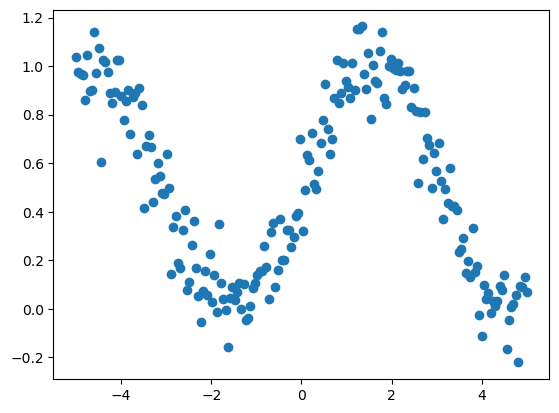

Epoch 1/300
10/10 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 0.1410
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1393
Epoch 4/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1391
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 0.1378
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 0.1394
Epoch 7/300
10/10 [==============================] - 0s 4ms/step - loss: 0.1369
Epoch 8/300
10/10 [==============================] - 0s 3ms/step - loss: 0.1374
Epoch 9/300
10/10 [==============================] - 0s 3ms/step - loss: 0.1379
Epoch 10/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1312
Epoch 11/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1304
Epoch 12/300
10/10 [==============================] - 0s 4ms/step - loss: 0.1273
Epoch 13/300
10/10 [=================

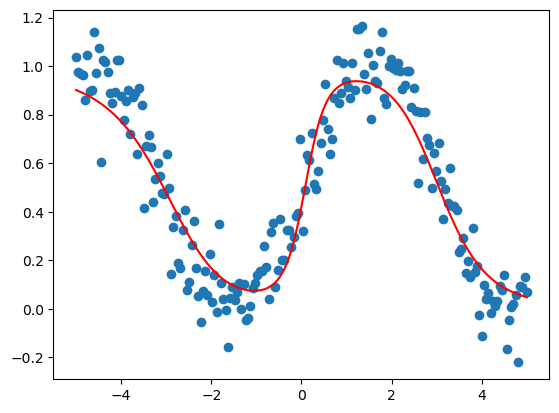

In [48]:
# 生成正弦波数据
data = numpy.linspace(-5, 5, 200)
noise = numpy.random.normal(0, 0.1, data.shape)
y = (numpy.sin(data)+1)/2 + noise

# 绘制散点图
plt.scatter(data, y)
plt.show()

# 构建模型
model = Sequential()  # 按顺序构成的模型，输入层，隐藏层，输出层

# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10, input_dim=1, activation='sigmoid'))  # 第一个隐藏层，10个神经元，使用sigmoid激活函数
model.add(Dense(units=1, activation='sigmoid'))  # 输出层，1个神经元

sgd = SGD(learning_rate=1.0)  # 可以调整学习率
model.compile(optimizer=sgd, loss='mse')  # 优化方式，损失函数

# 训练模型
history = model.fit(data, y, epochs=300, batch_size=20, verbose=1)

# 训练好的函数
pre = model.predict(data, batch_size=100)

# 画图
plt.scatter(data, y)  # 散点图
plt.plot(data, pre, 'r-')  # 预测曲线
plt.show()

### 拟合复杂正弦波

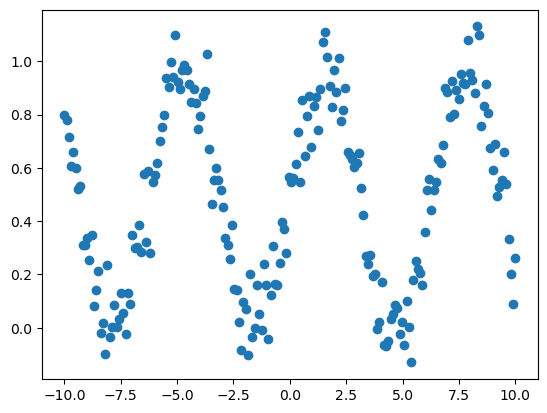

Epoch 1/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1215
Epoch 2/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1210
Epoch 3/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1212
Epoch 4/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1206
Epoch 5/2000
10/10 [==============================] - 0s 7ms/step - loss: 0.1209
Epoch 6/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1210
Epoch 7/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1202
Epoch 8/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1215
Epoch 9/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1208
Epoch 10/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1199
Epoch 11/2000
10/10 [==============================] - 0s 6ms/step - loss: 0.1205
Epoch 12/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1206
Epoch 13/2000
10/10 [====

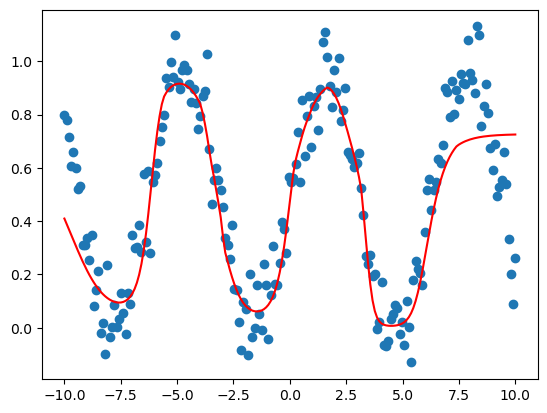

In [52]:
# 生成正弦波数据
data = numpy.linspace(-10, 10, 200)
noise = numpy.random.normal(0, 0.1, data.shape)
y = (numpy.sin(data)+1)/2 + noise

# 绘制散点图
plt.scatter(data, y)
plt.show()

# 构建模型
model = Sequential()  # 按顺序构成的模型，输入层，隐藏层，输出层

# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10, input_dim=1, activation='ReLU'))  # 第一个隐藏层，10个神经元，使用sigmoid激活函数
model.add(Dense(units=10, activation='sigmoid'))  # 输出层，1个神经元
model.add(Dense(units=5, activation='sigmoid'))  # 输出层，1个神经元
model.add(Dense(units=5, activation='ReLU'))  # 输出层，1个神经元
model.add(Dense(units=1, activation='sigmoid'))  # 输出层，1个神经元

sgd = SGD(learning_rate=0.15)  # 可以调整学习率
model.compile(optimizer=sgd, loss='mse')  # 优化方式，损失函数

# 训练模型
history = model.fit(data, y, epochs=2000, batch_size=20, verbose=1)

# 训练好的函数
pre = model.predict(data, batch_size=100)

# 画图
plt.scatter(data, y)  # 散点图
plt.plot(data, pre, 'r-')  # 预测曲线
plt.show()

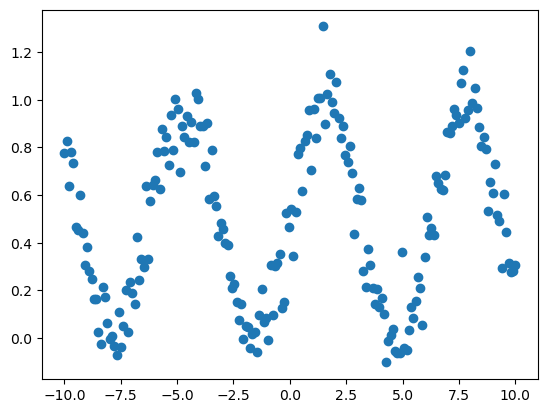

Epoch 1/2000
10/10 [==============================] - 0s 6ms/step - loss: 0.1437
Epoch 2/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1243
Epoch 3/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1235
Epoch 4/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1227
Epoch 5/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1228
Epoch 6/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1222
Epoch 7/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1214
Epoch 8/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1207
Epoch 9/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1181
Epoch 10/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1147
Epoch 11/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1125
Epoch 12/2000
10/10 [==============================] - 0s 5ms/step - loss: 0.1041
Epoch 13/2000
10/10 [====

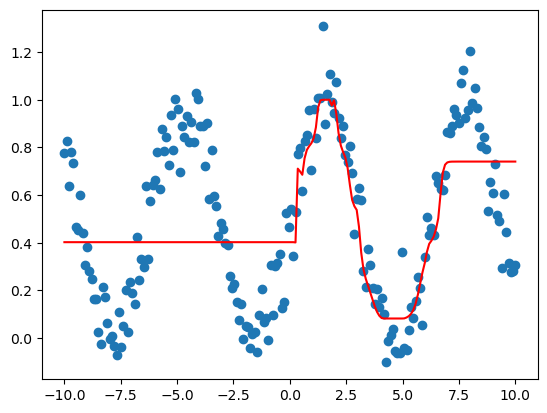

In [54]:
# 生成正弦波数据
data = numpy.linspace(-10, 10, 200)
noise = numpy.random.normal(0, 0.1, data.shape)
y = (numpy.sin(data)+1)/2 + noise

# 绘制散点图
plt.scatter(data, y)
plt.show()

# 构建模型
model = Sequential()  # 按顺序构成的模型，输入层，隐藏层，输出层

# 添加输入层和隐藏层、激活函数
model.add(Dense(units=10, input_dim=1, activation='ReLU'))  # 第一个隐藏层，10个神经元，使用sigmoid激活函数
model.add(Dense(units=10, activation='sigmoid'))  # 输出层，1个神经元
model.add(Dense(units=5, activation='sigmoid'))  # 输出层，1个神经元
model.add(Dense(units=5, activation='ReLU'))  # 输出层，1个神经元
model.add(Dense(units=1, activation='sigmoid'))  # 输出层，1个神经元

adam = keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(optimizer=adam, loss='mse')  # 优化方式，损失函数

# 训练模型
history = model.fit(data, y, epochs=2000, batch_size=20, verbose=1)

# 训练好的函数
pre = model.predict(data, batch_size=100)

# 画图
plt.scatter(data, y)  # 散点图
plt.plot(data, pre, 'r-')  # 预测曲线
plt.show()

> 可见随着折线数量的上升，单属性值拟合的难度成倍上升，基本上难以满足要求

## 多属性值拟合

先在一个周期上能够完成单属性值拟合

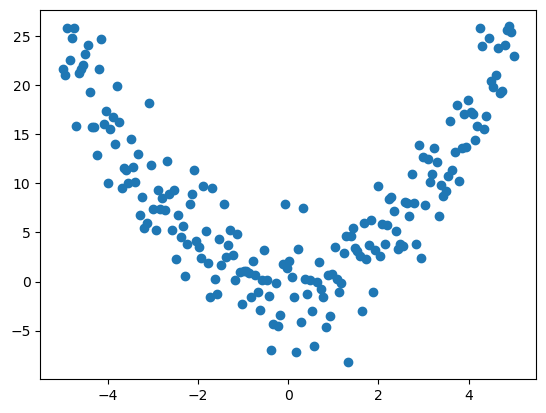

Epoch 1/500
10/10 [==============================] - 0s 5ms/step - loss: 134.2095
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 123.9169
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 108.7824
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 86.6810
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 71.8997
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 69.0159
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 68.4325
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 67.9128
Epoch 9/500
10/10 [==============================] - 0s 5ms/step - loss: 68.4356
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 68.0781
Epoch 11/500
10/10 [==============================] - 0s 5ms/step - loss: 67.6000
Epoch 12/500
10/10 [==============================] - 0s 4ms/step - loss: 67.6475
Epoch 13/500
10/10 [==

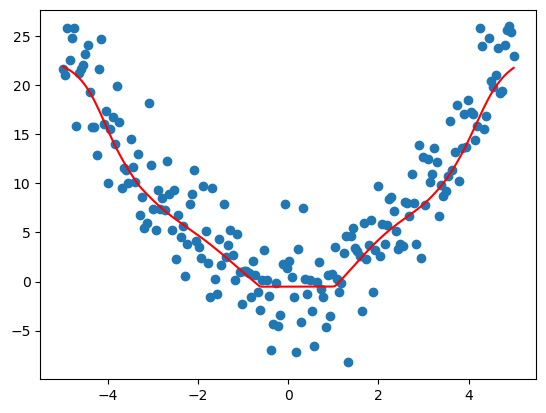

In [4]:
# 生成正弦波
data = numpy.linspace(-12, 12, 200)
noise = numpy.random.normal(0, 3, data.shape)
y = data ** 2 + noise
# 生成周期特征
period1 = numpy.full((1,50),-5)
period2 = numpy.full((1,50),-2.5)
period3 = numpy.full((1,50),2.5)
period4 = numpy.full((1,50),5)
period = numpy.concatenate((period1, period2, period3, period4), axis=1)

# 绘制散点图
plt.scatter(data, y)
plt.show()

# 构建模型
model = Sequential()  # 按顺序构成的模型，输入层，隐藏层，输出层
sgd = SGD(learning_rate=0.003)  # 自定义优化算法随机梯度下降法，设置学习率，默认为0.01

# 添加输入层和隐藏层、激活函数
model.add(Dense(units=8, input_dim=1, activation='sigmoid'))  # 第一个隐藏层，8个神经元，使用sigmoid激活函数
model.add(Dense(units=8, activation='relu'))  # 第二个隐藏层，8个神经元，使用relu激活函数
model.add(Dense(units=5, activation='sigmoid'))  # 第三个隐藏层，5个神经元，使用sigmoid激活函数
model.add(Dense(units=5, activation='relu'))  # 第四个隐藏层，5个神经元，使用relu激活函数
model.add(Dense(units=1))  # 输出层，1个神经元

model.compile(optimizer=sgd, loss='mse')  # 优化方式，损失函数

# 训练模型
model.fit(data, y, epochs=500, batch_size=20, verbose=0)  # 使用fit方法训练模型

# 训练好的函数
pre = model.predict(data, batch_size=100)  # 对输入数据进行预测

# 画图
plt.scatter(data, y)  # 散点图
plt.plot(data, pre, 'r-')  # 预测曲线
plt.show()

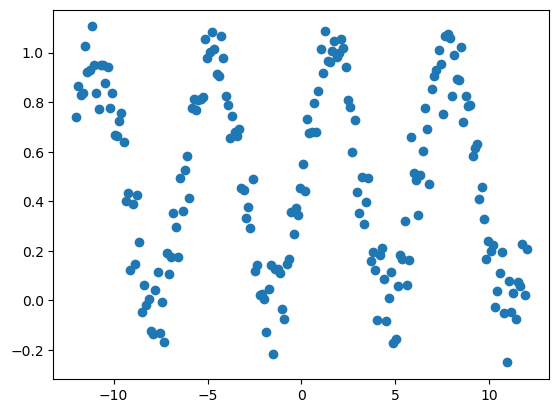

Epoch 1/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1397
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 0.1383
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1368
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1284
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 0.1080
Epoch 6/500
9/9 [==============================] - 0s 6ms/step - loss: 0.0844
Epoch 7/500
9/9 [==============================] - 0s 6ms/step - loss: 0.0723
Epoch 8/500
9/9 [==============================] - 0s 5ms/step - loss: 0.0763
Epoch 9/500
9/9 [==============================] - 0s 6ms/step - loss: 0.0693
Epoch 10/500
9/9 [==============================] - 0s 5ms/step - loss: 0.0676
Epoch 11/500
9/9 [==============================] - 0s 6ms/step - loss: 0.0622
Epoch 12/500
9/9 [==============================] - 0s 6ms/step - loss: 0.0644
Epoch 13/500
9/9 [==============================] - 0s 6ms/st

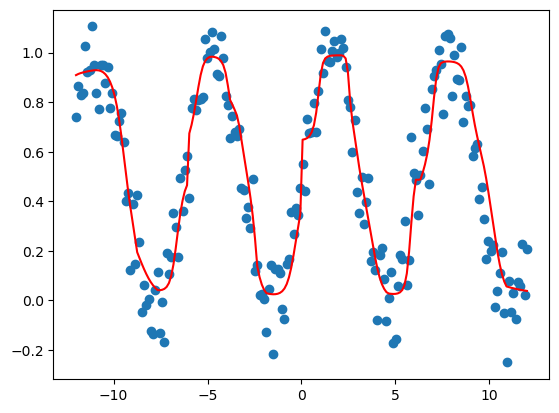

In [5]:
# 生成正弦波
data = numpy.linspace(-12, 12, 200)
noise = numpy.random.normal(0, 0.1, data.shape)
y = (numpy.sin(data)+1)/2 + noise
# 生成周期特征
period1 = numpy.full((1,50),-5)
period2 = numpy.full((1,50),-2.5)
period3 = numpy.full((1,50),2.5)
period4 = numpy.full((1,50),5)
period = numpy.concatenate((period1, period2, period3, period4), axis=1)
period = period.reshape(200, 1)
data = data.reshape(200, 1)
feature = numpy.concatenate((period, data), axis=1)

feature_train, feature_test, y_train, y_test = train_test_split(feature, y, test_size=0.15, random_state=12)

# 绘制散点图
plt.scatter(data, y)
plt.show()

# 构建模型
model = Sequential()  # 按顺序构成的模型，输入层，隐藏层，输出层

# 添加输入层和隐藏层、激活函数

model.add(Dense(units=8, input_dim=2,activation='relu'))  # 第二个隐藏层，8个神经元，使用relu激活函数
model.add(Dense(units=8, activation='sigmoid'))  # 第一个隐藏层，8个神经元，使用sigmoid激活函数
model.add(Dense(units=5, activation='sigmoid'))  # 第三个隐藏层，5个神经元，使用sigmoid激活函数
model.add(Dense(units=5, activation='relu'))  # 第四个隐藏层，5个神经元，使用relu激活函数
model.add(Dense(units=1, activation='sigmoid'))  # 输出层，1个神经元
# model.add(Dense(units=1))  # 输出层，1个神经元

adam = keras.optimizers.Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(optimizer=adam, loss='mse')  # 优化方式，损失函数

# 训练模型
model.fit(feature_train, y_train, epochs=500, batch_size=20, verbose=1)  # 使用fit方法训练模型

# 训练好的函数
pre = model.predict(feature, batch_size=100)  # 对输入数据进行预测
loss = model.evaluate(feature_test, y_test)
print("Loss on test data:", loss)

# 画图
plt.scatter(data, y)  # 散点图
plt.plot(data, pre, 'r-')  # 预测曲线
plt.show()

> 得到结论：增加强相关型属性值将极大增加拟合效果，adam算法可以继承SGD参数，但是容易过拟合

### 再次增加属性值

将前三个点的函数值的均值求出来，作为新的属性

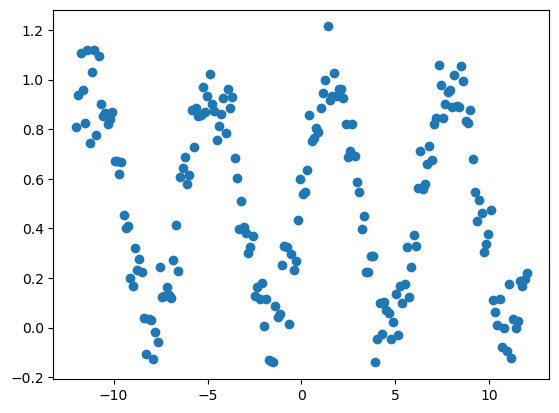

Epoch 1/50
9/9 [==============================] - 0s 6ms/step - loss: 0.1219
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0753
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0402
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0331
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0310
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0293
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0299
Epoch 8/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0290
Epoch 9/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0253
Epoch 10/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0238
Epoch 11/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0233
Epoch 12/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0247
Epoch 13/50
9/9 [==============================] - 0s 5ms/step - loss: 0.

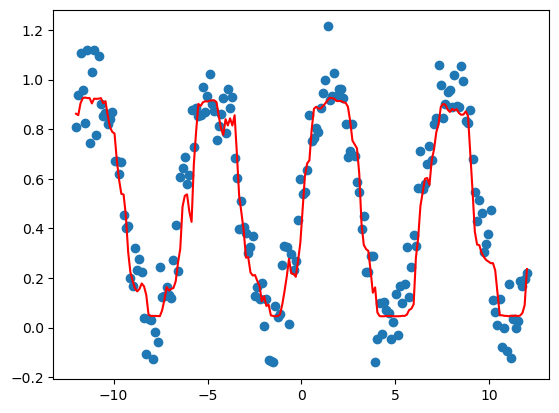

In [8]:
# 生成正弦波
data = numpy.linspace(-12, 12, 200)
noise = numpy.random.normal(0, 0.1, data.shape)
y = (numpy.sin(data)+1)/2 + noise
# 生成周期特征
period1 = numpy.full((1,50),-5)
period2 = numpy.full((1,50),-2.5)
period3 = numpy.full((1,50),2.5)
period4 = numpy.full((1,50),5)
period = numpy.concatenate((period1, period2, period3, period4), axis=1)
period = period.reshape(200, 1)
data = data.reshape(200, 1)

mean = numpy.ones((200,1))
mean[0] = y[0]
mean[1] = y[0]
mean[2] = (y[0] + y[1])/2
for i in range(3,199):
    mean[i] = (y[i-3] + y[i-2] + y[i-1])/3
mean = (mean*2-1)*5

feature = numpy.concatenate((period, data, mean), axis=1)

feature_train, feature_test, y_train, y_test = train_test_split(feature, y, test_size=0.15, random_state=12)

# 绘制散点图
plt.scatter(data, y)
plt.show()

# 构建模型
model = Sequential()  # 按顺序构成的模型，输入层，隐藏层，输出层

# 添加输入层和隐藏层、激活函数

model.add(Dense(units=10, input_dim=3,activation='relu'))  # 第二个隐藏层，8个神经元，使用relu激活函数
model.add(Dense(units=10, activation='sigmoid'))  # 第一个隐藏层，8个神经元，使用sigmoid激活函数
model.add(Dense(units=5, activation='sigmoid'))  # 第三个隐藏层，5个神经元，使用sigmoid激活函数
model.add(Dense(units=5, activation='relu'))  # 第四个隐藏层，5个神经元，使用relu激活函数
model.add(Dense(units=1, activation='sigmoid'))  # 输出层，1个神经元
# model.add(Dense(units=1))  # 输出层，1个神经元

adam = keras.optimizers.Adam(learning_rate=0.03, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(optimizer=adam, loss='mse')  # 优化方式，损失函数

# 训练模型
model.fit(feature_train, y_train, epochs=50, batch_size=20, verbose=1)  # 使用fit方法训练模型

# 训练好的函数
pre = model.predict(feature, batch_size=100)  # 对输入数据进行预测
loss = model.evaluate(feature_test, y_test)
print("Loss on test data:", loss)

# 画图
plt.scatter(data, y)  # 散点图
plt.plot(data, pre, 'r-')  # 预测曲线
plt.show()

> 新增相关性没有那么强的数据可以极大增加拟合速度，更容易学到原数据所难以体现的特征，但是容易过拟合